In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# column names for the DIAMOND output
names = ['query accession', 'target accession', 'sequence identity', 'length', 'mismatches', 'gap openings', 'query start',
          'query end', 'target start', 'target end', 'e-value', 'bit score']

df_blosum = pd.read_csv('Alphaproteobacteria_bacterium_blosum62.tsv', sep='\t', names=names)
df_our = pd.read_csv('Alphaproteobacteria_bacterium_our_62.tsv', sep='\t', names=names)

In [3]:
df_blosum.head()

,query accession,target accession,sequence identity,length,mismatches,gap openings,query start,query end,target start,target end,e-value,bit score
0,RYZ01612,Q0C1A3.1,90.0,30,3,0,1,30,1,30,1.130000e-11,58.6
1,RYZ01612,Q0APU7.1,86.7,30,4,0,1,30,1,30,8.390000e-11,56.2
2,RYZ01612,B4RBX6.1,83.3,30,5,0,1,30,1,30,1.150000e-10,55.8
3,RYZ01612,Q9A724.2,83.3,30,5,0,1,30,1,30,1.180000e-10,55.8
4,RYZ01612,B0SYZ8.1,80.0,30,6,0,1,30,1,30,4.370000e-10,54.2


In [4]:
df_our.head()

,query accession,target accession,sequence identity,length,mismatches,gap openings,query start,query end,target start,target end,e-value,bit score
0,RYZ01612,Q0C1A3.1,90.0,30,3,0,1,30,1,30,4.790000e-09,49.4
1,RYZ01612,Q0APU7.1,86.7,30,4,0,1,30,1,30,3.170000e-08,47.4
2,RYZ01612,B8EK86.1,83.3,30,5,0,1,30,1,30,6.850000e-08,46.5
3,RYZ01612,B4RBX6.1,83.3,30,5,0,1,30,1,30,9.290000e-08,46.1
4,RYZ01612,Q9A724.2,83.3,30,5,0,1,30,1,30,9.720000e-08,46.1


In [5]:
def generate_histogram_comparison(feature: str, bins: int, log: bool) -> None:
    ''' Get the actual values '''
    e_values_blosum = df_blosum[feature].to_numpy()
    e_values_our = df_our[feature].to_numpy()
    
    ''' Generate the bins '''
    min_val = min(np.amin(e_values_blosum), np.amin(e_values_our))
    max_val = max(np.amax(e_values_blosum), np.amax(e_values_our))

    bins = np.linspace(min_val, max_val, bins+1)
    
    ''' Generate the two histograms '''
    plt.hist(e_values_blosum, bins=bins, alpha=0.5, density=True, log=log, label='BLOSUM', edgecolor='grey', color='mediumseagreen')
    plt.hist(e_values_our, bins=bins, alpha=0.5, density=True, log=log, label='Our matrix', edgecolor='grey', color='mediumorchid')
    
    ''' Beautify the overall plot '''
    plt.legend()
    plt.ylabel('density')
    plt.xlabel(feature)

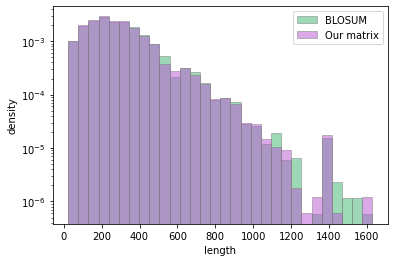

In [6]:
generate_histogram_comparison('length', 30, log=True) 

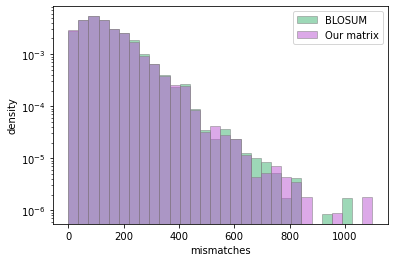

In [7]:
generate_histogram_comparison('mismatches', 30, log=True)

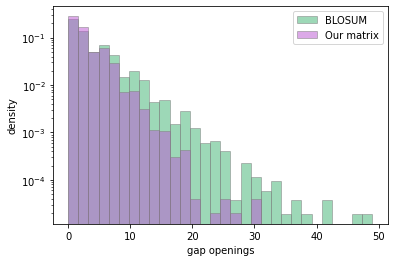

In [8]:
generate_histogram_comparison('gap openings', 30, log=True)